<a href="https://colab.research.google.com/github/Soomin-Maxwell/Medical_AI_study/blob/main/Medical_Image_processing_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
!echo "Loading data"
!pip install gdown
!gdown https://drive.google.com/uc?id=1qNpH_0BEy-JJE5VMNfb8kuNN2KfsFLsi!unzip Images.zip

Loading data
usage: gdown [-h] [-V] [-O OUTPUT] [-q] [--id] url_or_id
gdown: error: unrecognized arguments: Images.zip


In [27]:
import os
import shutil

import matplotlib.pyplot as plt
import numpy as np
import nibabel as nib

import glob

def show_slice(slice) : 
  plt.figure()
  plt.imshow(slice.T, cmap= 'gray', origin = "lower")

def show_slice_window(slice, level, window) :
  max = level + window/2
  min = level - window/2
  slice = slice.clip(min,max)

  plt.figure()
  plt.imshow(slice.T, cmap = "gray", origin = "lower")
  plt.savefig("L"+ str(level) + "W" + str(window))

def overlay_plot(im,mask) :
  plt.figure()
  plt.imshow(im.T, 'gray', interpolation = 'none')
  plt.imshow(mask.T, 'jet', interpolation = 'none', alpha=0.5)

## Read Data

image found 21
------------------------------
Original / Tissues / Lungs


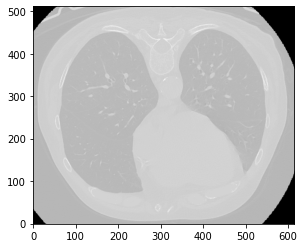

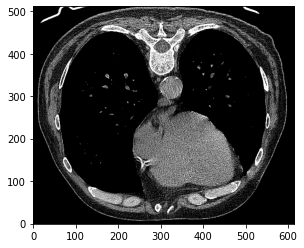

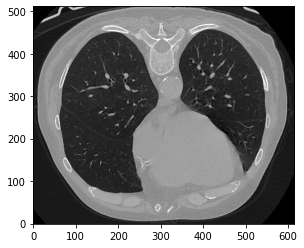

In [28]:
basepath = "./Images/slice*.nii.gz"
paths = sorted(glob.glob(basepath))
print("image found", len(paths))

for c,exam_path in enumerate(paths) :
  ct_img = nib.load(exam_path)
  ct_numpy = ct_img.get_fdata()

  if c == 5 : 
    show_slice(ct_numpy)
    print("-"*30)
    print("Original / Tissues / Lungs")
    plt.savefig("original")
    show_slice_window(ct_numpy, 50, 350)
    show_slice_window(ct_numpy, -200,2000)
    break
